In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
s1_local_client_TT_path = 'output/local_client_TT_Claudia.txt'
s1_local_server_TT_path = 'output/local_server_TT_Claudia.txt'
s1_local_IT_path = 'output/local_server_IT_Claudia.txt'

s2_local_client_TT_path = 'output/local_client_TT_Luiza.txt'
s2_local_server_TT_path = 'output/local_server_TT_Luiza.txt'
s2_local_IT_path = 'output/local_server_IT_Luiza.txt'

s3_local_client_TT_path = 'output/local_client_TT_Jam.txt'
s3_local_server_TT_path = 'output/local_server_TT_Jam.txt'
s3_local_IT_path = 'output/local_server_IT_Jam.txt'


# aws
aws_client_TT_path = 'output/aws_t1.txt'
aws_server_TT_path = 'output/aws_t2.txt'
aws_timings_path = 'output/timings_table_dic2024s.csv'


In [18]:
s1_local_client_TT = pd.read_csv(s1_local_client_TT_path, sep=',', header=None, names=['ImageID', 't1_client', 't2_client'])
s1_local_server_TT = pd.read_csv(s1_local_server_TT_path, sep=',', header=None, names=['ImageID', 't1_server', 't2_server'])
s1_local_TT = pd.merge(s1_local_client_TT, s1_local_server_TT, on='ImageID')
s1_local_IT = pd.read_csv(s1_local_IT_path, sep=',', header=None, names=['ImageID', 'it', 'it_average'])

s2_local_client_TT = pd.read_csv(s2_local_client_TT_path, sep=',', header=None, names=['ImageID', 't1_client', 't2_client'])
s2_local_server_TT = pd.read_csv(s2_local_server_TT_path, sep=',', header=None, names=['ImageID', 't1_server', 't2_server'])
s2_local_TT = pd.merge(s2_local_client_TT, s2_local_server_TT, on='ImageID')
s2_local_IT = pd.read_csv(s2_local_IT_path, sep=',', header=None, names=['ImageID', 'it', 'it_average'])

s3_local_client_TT = pd.read_csv(s3_local_client_TT_path, sep=',', header=None, names=['ImageID', 't1_client', 't2_client'])
s3_local_server_TT = pd.read_csv(s3_local_server_TT_path, sep=',', header=None, names=['ImageID', 't1_server', 't2_server'])
s3_local_TT = pd.merge(s3_local_client_TT, s3_local_server_TT, on='ImageID')
s3_local_IT = pd.read_csv(s3_local_IT_path, sep=',', header=None, names=['ImageID', 'it', 'it_average'])


# aws
aws_client_TT = pd.read_csv(aws_client_TT_path, sep=',', header=None, names=['ImageID', 't1_client', 't1_server'])
aws_server_TT = pd.read_csv(aws_server_TT_path, sep=',', header=None, names=['ImageID', 't2_client', 't2_server'])
aws_TT = pd.merge(aws_client_TT, aws_server_TT, on='ImageID')
aws_IT = pd.read_csv(aws_timings_path, sep=',')


In [19]:
s1_local_TT['t1'] = s1_local_TT['t1_server'] - s1_local_TT['t1_client']
s1_local_TT['t2'] = s1_local_TT['t2_client'] - s1_local_TT['t2_server']

s2_local_TT['t1'] = s2_local_TT['t1_server'] - s2_local_TT['t1_client']
s2_local_TT['t2'] = s2_local_TT['t2_client'] - s2_local_TT['t2_server']

s3_local_TT['t1'] = s3_local_TT['t1_server'] - s3_local_TT['t1_client']
s3_local_TT['t2'] = s3_local_TT['t2_client'] - s3_local_TT['t2_server']

# aws
aws_TT['t1'] = aws_TT['t1_server'] - aws_TT['t1_client']
aws_TT['t2'] = aws_TT['t2_client'] - aws_TT['t2_server']

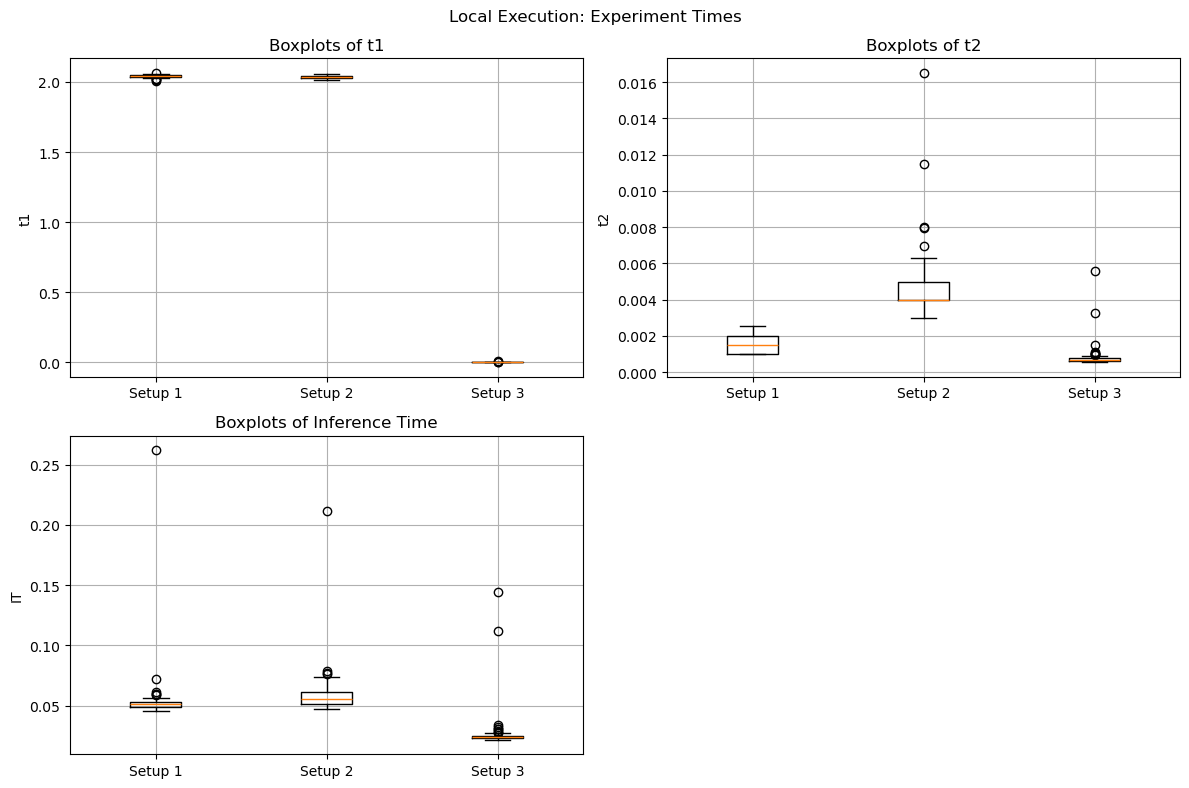

In [20]:
plt.figure(figsize=(12, 8))
plt.suptitle("Local Execution: Experiment Times")

# Boxplots for t1
plt.subplot(2, 2, 1)
plt.boxplot([s1_local_TT['t1'], s2_local_TT['t1'], s3_local_TT['t1']], vert=True, labels=['Setup 1', 'Setup 2', 'Setup 3'])
plt.title('Boxplots of t1')
plt.ylabel('t1')
plt.grid(True)

# Boxplots for t2
plt.subplot(2, 2, 2)
plt.boxplot([s1_local_TT['t2'], s2_local_TT['t2'], s3_local_TT['t2']], vert=True, labels=['Setup 1', 'Setup 2', 'Setup 3'])
plt.title('Boxplots of t2')
plt.ylabel('t2')
plt.grid(True)

# Boxplots for IT
plt.subplot(2, 2, 3)
plt.boxplot([s1_local_IT['it'], s2_local_IT['it'], s3_local_IT['it']], vert=True, labels=['Setup 1', 'Setup 2', 'Setup 3'])
plt.title('Boxplots of Inference Time')
plt.ylabel('IT')
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
aws_TT

,ImageID,t1_client,t1_server,t2_client,t2_server,t1,t2
0,274d4c02-1fcb-4653-8cbf-05add506f773,1.720376e+09,1.720376e+09,1.720376e+09,1.720376e+09,2.813903,1.115611
1,ff0fde6a-e32e-4675-a7f2-f53863f01536,1.720376e+09,1.720376e+09,1.720376e+09,1.720376e+09,2.739391,1.416928
2,67f979ec-bac0-4d0b-88f2-c4d1e177a71c,1.720376e+09,1.720376e+09,1.720376e+09,1.720376e+09,2.930890,1.442438
3,6966b715-b3fc-4b0b-a57f-63e380a97ae1,1.720376e+09,1.720376e+09,1.720376e+09,1.720376e+09,2.715525,0.887681
4,c5cc2a6f-8c63-4bd1-b856-a05bfdb554a1,1.720376e+09,1.720376e+09,1.720376e+09,1.720376e+09,2.397108,1.175459
...,...,...,...,...,...,...,...
95,cfc9d38c-c105-4077-81a8-7b1bf4529b56,1.720377e+09,1.720377e+09,1.720377e+09,1.720377e+09,2.934412,1.399778
96,bc623135-e4b4-4954-9b17-f5a3a99e0c31,1.720377e+09,1.720377e+09,1.720377e+09,1.720377e+09,3.069917,1.176512
97,f8c7ad39-6c6a-49d8-b615-a17ad0521af4,1.720377e+09,1.720377e+09,1.720377e+09,1.720377e+09,2.237388,1.426961
98,9017253b-a547-4dc6-a1d3-1db63ffde94b,1.720377e+09,1.720377e+09,1.720377e+09,1.720377e+09,3.686222,1.230708


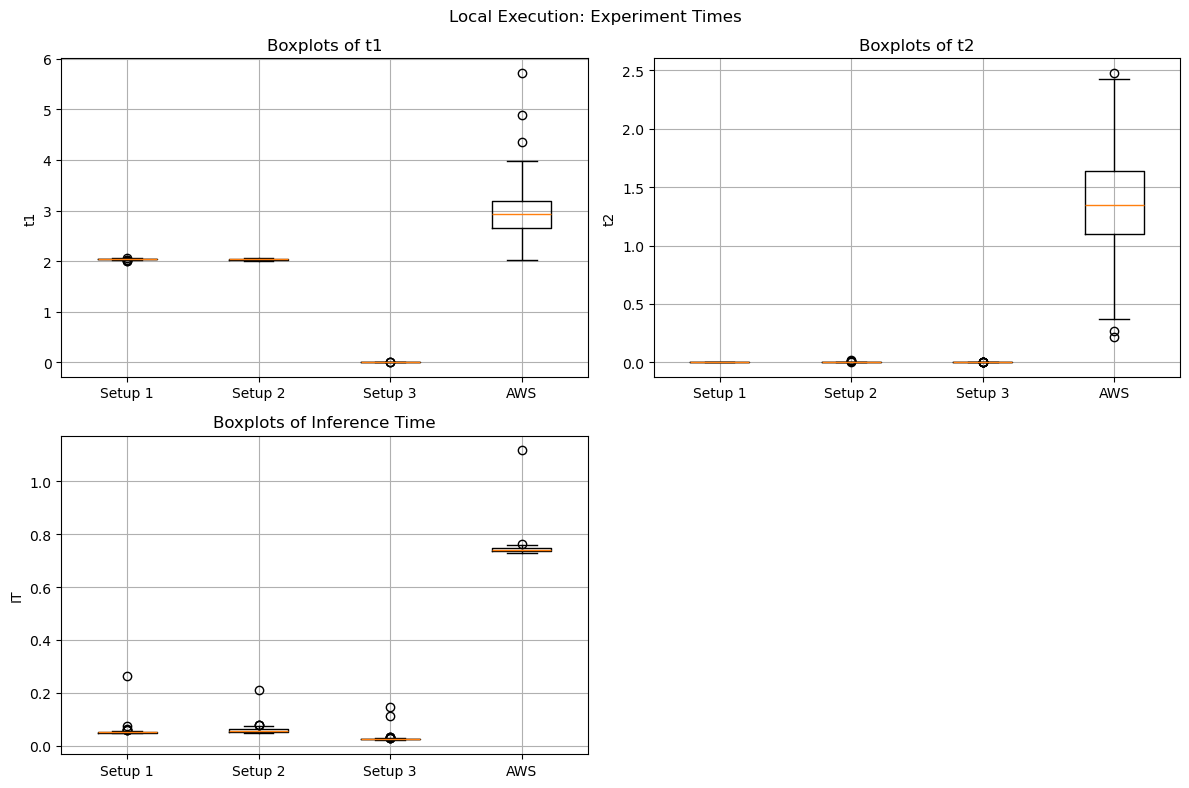

In [22]:
plt.figure(figsize=(12, 8))
plt.suptitle("Local Execution: Experiment Times")

# Boxplots for t1
plt.subplot(2, 2, 1)
plt.boxplot([s1_local_TT['t1'], s2_local_TT['t1'], s3_local_TT['t1'], aws_TT['t1']], vert=True, labels=['Setup 1', 'Setup 2', 'Setup 3', 'AWS'])
plt.title('Boxplots of t1')
plt.ylabel('t1')
plt.grid(True)

# Boxplots for t2
plt.subplot(2, 2, 2)
plt.boxplot([s1_local_TT['t2'], s2_local_TT['t2'], s3_local_TT['t2'], aws_TT['t2']], vert=True, labels=['Setup 1', 'Setup 2', 'Setup 3', 'AWS'])
plt.title('Boxplots of t2')
plt.ylabel('t2')
plt.grid(True)

# Boxplots for IT
plt.subplot(2, 2, 3)
plt.boxplot([s1_local_IT['it'], s2_local_IT['it'], s3_local_IT['it'], aws_IT['InferenceTime']], vert=True, labels=['Setup 1', 'Setup 2', 'Setup 3', 'AWS'])
plt.title('Boxplots of Inference Time')
plt.ylabel('IT')
plt.grid(True)

plt.tight_layout()
plt.show()